In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats

%matplotlib inline

from statsmodels.stats.outliers_influence import variance_inflation_factor

import statsmodels.formula.api as smf

In [2]:
import xlrd

In [3]:
cust_behavior=pd.read_excel(r'C:/Users/Ankita/OneDrive - Infiniti Research/Documents/ML Class Notes_Alabs/CaseStudy_practiceProjects/CustomerBehaviorData.xlsx')

In [4]:
cust_behavior.head()

,ID,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,...,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active
0,17051,3412.60,2909.34,1077.36,3084.50,4615.97,6693.0,19.0,10,2,...,1,108,97916.0,45253.64,47635.00,2,18,19947.0,Y,3448.84
1,11491,18133.76,3877.00,6123.78,5597.43,64620.00,6117.0,4.0,60,1,...,1,4,25125.0,12912.33,18369.00,3,49,20585.0,Y,3812.69
2,7433,6363.65,735.49,8799.00,13768.00,38266.00,2638.0,2.0,83,47,...,70,11,38546.0,93567.51,26713.00,47,49,13950.0,Y,9432.90
3,14606,12765.66,4429.16,16745.86,6360.00,29063.97,3711.0,12.0,2,16,...,43,1,180315.0,176394.48,35062.74,3,37,37018.0,Y,144.61
4,8381,27819.70,1944.00,7006.50,2228.50,1096.25,1065.0,15.0,13,61,...,2,14,13480.0,3167.00,19056.00,2,15,24274.0,Y,1887.89


In [6]:
credit_cc=pd.read_excel(r'C:/Users/Ankita/OneDrive - Infiniti Research/Documents/ML Class Notes_Alabs/CaseStudy_practiceProjects/CreditConsumptionData.xlsx')

In [7]:
credit_cc

,ID,cc_cons
0,12554,20014.0
1,17645,10173.0
2,7604,16095.0
3,1590,7707.0
4,16556,96408.0
...,...,...
19995,12512,NaN
19996,14224,NaN
19997,18740,NaN
19998,18134,NaN


In [8]:
df=pd.merge(left=cust_behavior, right= credit_cc, how="left", left_on="ID", right_on="ID")

In [9]:
df.head()

,ID,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,...,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active,cc_cons
0,17051,3412.60,2909.34,1077.36,3084.50,4615.97,6693.0,19.0,10,2,...,108,97916.0,45253.64,47635.00,2,18,19947.0,Y,3448.84,13434.0
1,11491,18133.76,3877.00,6123.78,5597.43,64620.00,6117.0,4.0,60,1,...,4,25125.0,12912.33,18369.00,3,49,20585.0,Y,3812.69,449.0
2,7433,6363.65,735.49,8799.00,13768.00,38266.00,2638.0,2.0,83,47,...,11,38546.0,93567.51,26713.00,47,49,13950.0,Y,9432.90,11968.0
3,14606,12765.66,4429.16,16745.86,6360.00,29063.97,3711.0,12.0,2,16,...,1,180315.0,176394.48,35062.74,3,37,37018.0,Y,144.61,32029.0
4,8381,27819.70,1944.00,7006.50,2228.50,1096.25,1065.0,15.0,13,61,...,14,13480.0,3167.00,19056.00,2,15,24274.0,Y,1887.89,16394.0


In [10]:
customer_demog=pd.read_excel(r'C:/Users/Ankita/OneDrive - Infiniti Research/Documents/ML Class Notes_Alabs/CaseStudy_practiceProjects/CustomerDemographics.xlsx')

In [11]:
customer_demog

,ID,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction
0,19427,current,M,63,MEDIUM,30.1,10,628.0,1,5.0
1,16150,current,M,36,MEDIUM,14.4,10,656.0,0,12.0
2,11749,current,F,28,MEDIUM,4.8,10,314.0,1,13.0
3,11635,current,M,32,MEDIUM,9.6,2,614.0,1,19.0
4,8908,current,M,32,HIGH,12.0,7,750.0,1,18.0
...,...,...,...,...,...,...,...,...,...,...
19995,1270,current,F,66,MEDIUM,32.2,6,354.0,1,7.0
19996,15992,current,M,53,MEDIUM,19.8,5,809.0,0,14.0
19997,7081,current,F,66,MEDIUM,18.4,1,466.0,0,10.0
19998,6821,current,M,32,LOW,6.0,8,619.0,0,17.0


In [12]:
df_final=pd.merge(left=df, right= customer_demog, how="left", left_on="ID", right_on="ID")

In [13]:
df_final.head()

,ID,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,...,cc_cons,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction
0,17051,3412.60,2909.34,1077.36,3084.50,4615.97,6693.0,19.0,10,2,...,13434.0,current,M,30,MEDIUM,7.0,5,956.0,1,20.0
1,11491,18133.76,3877.00,6123.78,5597.43,64620.00,6117.0,4.0,60,1,...,449.0,current,M,37,LOW,10.2,8,966.0,1,5.0
2,7433,6363.65,735.49,8799.00,13768.00,38266.00,2638.0,2.0,83,47,...,11968.0,current,M,33,MEDIUM,3.9,3,505.0,1,15.0
3,14606,12765.66,4429.16,16745.86,6360.00,29063.97,3711.0,12.0,2,16,...,32029.0,current,M,63,LOW,25.8,6,631.0,0,15.0
4,8381,27819.70,1944.00,7006.50,2228.50,1096.25,1065.0,15.0,13,61,...,16394.0,saving,M,33,MEDIUM,6.5,7,698.0,0,9.0


In [14]:
df_final.drop('ID',axis=1,inplace=True)

In [15]:
df_final.shape

(20000, 48)

In [16]:
df_final['cc_cons'].isnull().sum()

5000

In [17]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 0 to 19999
Data columns (total 48 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   cc_cons_apr                   20000 non-null  float64
 1   dc_cons_apr                   20000 non-null  float64
 2   cc_cons_may                   19999 non-null  float64
 3   dc_cons_may                   20000 non-null  float64
 4   cc_cons_jun                   20000 non-null  float64
 5   dc_cons_jun                   19999 non-null  float64
 6   cc_count_apr                  19999 non-null  float64
 7   cc_count_may                  20000 non-null  int64  
 8   cc_count_jun                  20000 non-null  int64  
 9   dc_count_apr                  20000 non-null  int64  
 10  dc_count_may                  20000 non-null  int64  
 11  dc_count_jun                  20000 non-null  int64  
 12  card_lim                      20000 non-null  int64  
 13  p

# Checking Missing values

In [18]:
df_final.isnull().sum()

cc_cons_apr                        0
dc_cons_apr                        0
cc_cons_may                        1
dc_cons_may                        0
cc_cons_jun                        0
dc_cons_jun                        1
cc_count_apr                       1
cc_count_may                       0
cc_count_jun                       0
dc_count_apr                       0
dc_count_may                       0
dc_count_jun                       0
card_lim                           0
personal_loan_active               0
vehicle_loan_active                0
personal_loan_closed               1
vehicle_loan_closed                0
investment_1                       0
investment_2                       0
investment_3                       2
investment_4                       0
debit_amount_apr                   0
credit_amount_apr                  0
debit_count_apr                    1
credit_count_apr                   0
max_credit_amount_apr              0
debit_amount_may                   0
c

In [19]:
#df = df.select_dtypes(include='int64')
#df_numerical = df.select_dtypes(exclude=’object’)
#df_numerical_cols = df_numerical.columns.tolist()
#df_categorical_cols = df_categorical.columns.tolist()

# Splitting the dataset into train and test based on missing values

In [20]:
df_train = df_final[df_final['cc_cons'].notnull()]
df_train

,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,...,cc_cons,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction
0,3412.60,2909.34,1077.36,3084.50,4615.97,6693.00,19.0,10,2,53,...,13434.0,current,M,30,MEDIUM,7.0,5,956.0,1,20.0
1,18133.76,3877.00,6123.78,5597.43,64620.00,6117.00,4.0,60,1,4,...,449.0,current,M,37,LOW,10.2,8,966.0,1,5.0
2,6363.65,735.49,8799.00,13768.00,38266.00,2638.00,2.0,83,47,4,...,11968.0,current,M,33,MEDIUM,3.9,3,505.0,1,15.0
3,12765.66,4429.16,16745.86,6360.00,29063.97,3711.00,12.0,2,16,24,...,32029.0,current,M,63,LOW,25.8,6,631.0,0,15.0
4,27819.70,1944.00,7006.50,2228.50,1096.25,1065.00,15.0,13,61,7,...,16394.0,saving,M,33,MEDIUM,6.5,7,698.0,0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,10443.76,1218.85,7252.24,3873.00,6633.00,10107.00,3.0,36,3,44,...,4263.0,current,F,53,LOW,13.2,9,653.0,1,20.0
14996,29890.33,6308.00,16025.50,7610.00,2213.08,841.60,1.0,34,4,7,...,11019.0,current,M,44,MEDIUM,2.4,9,535.0,1,2.0
14997,4148.98,948.74,19360.26,494.00,44363.91,1801.77,57.0,23,61,24,...,404227.0,current,M,37,MEDIUM,3.4,9,464.0,1,8.0
14998,115574.00,7191.05,44341.13,34817.20,20679.00,1010.00,7.0,128,44,3,...,28813.0,current,M,220,MEDIUM,40.0,10,536.0,1,3.0


In [21]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 0 to 14999
Data columns (total 48 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   cc_cons_apr                   15000 non-null  float64
 1   dc_cons_apr                   15000 non-null  float64
 2   cc_cons_may                   15000 non-null  float64
 3   dc_cons_may                   15000 non-null  float64
 4   cc_cons_jun                   15000 non-null  float64
 5   dc_cons_jun                   15000 non-null  float64
 6   cc_count_apr                  14999 non-null  float64
 7   cc_count_may                  15000 non-null  int64  
 8   cc_count_jun                  15000 non-null  int64  
 9   dc_count_apr                  15000 non-null  int64  
 10  dc_count_may                  15000 non-null  int64  
 11  dc_count_jun                  15000 non-null  int64  
 12  card_lim                      15000 non-null  int64  
 13  p

In [22]:
df_test = df_final[df_final['cc_cons'].isnull()].drop("cc_cons",axis=1)
df_test

,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,...,emi_active,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction
15000,2795.450,1290.00,6141.05,676.50,9146.10,15479.00,4.0,10,4,47,...,1170.49,current,M,37,MEDIUM,11.9,4,575.0,1,16.0
15001,29405.130,1640.00,1670.00,2463.92,10947.50,956.00,3.0,10,4,50,...,16447.45,current,M,33,MEDIUM,7.8,6,394.0,0,19.0
15002,5985.200,6189.00,2696.09,766.00,716.00,4133.22,7.0,30,5,24,...,2622.28,current,M,53,LOW,33.0,10,324.0,1,15.0
15003,2105.930,18225.00,34763.56,167.00,4260.27,20185.00,1.0,99,71,5,...,340.79,current,M,33,MEDIUM,7.8,5,370.0,1,7.0
15004,3269.000,3532.00,3158.40,2699.77,3373.48,5120.00,2.0,10,47,5,...,2812.20,current,M,62,LOW,12.6,9,505.0,1,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,4641.500,5979.58,6008.61,4410.00,41743.00,1884.00,26.0,1,4,1,...,7870.88,current,M,35,MEDIUM,13.5,1,523.0,0,7.0
19996,4994.450,2805.37,23214.00,5870.00,1041.00,1008.73,37.0,56,50,18,...,3668.30,current,M,53,MEDIUM,9.9,7,723.0,1,2.0
19997,3262.145,2871.00,7335.25,11774.04,4130.00,1413.00,12.0,77,1,1,...,5450.34,current,M,62,HIGH,37.8,8,863.0,1,16.0
19998,12824.010,4866.00,12242.48,284.00,15132.77,37911.00,67.0,1,4,1,...,59.29,current,M,34,MEDIUM,12.6,4,882.0,0,13.0


In [23]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 15000 to 19999
Data columns (total 47 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   cc_cons_apr                   5000 non-null   float64
 1   dc_cons_apr                   5000 non-null   float64
 2   cc_cons_may                   4999 non-null   float64
 3   dc_cons_may                   5000 non-null   float64
 4   cc_cons_jun                   5000 non-null   float64
 5   dc_cons_jun                   4999 non-null   float64
 6   cc_count_apr                  5000 non-null   float64
 7   cc_count_may                  5000 non-null   int64  
 8   cc_count_jun                  5000 non-null   int64  
 9   dc_count_apr                  5000 non-null   int64  
 10  dc_count_may                  5000 non-null   int64  
 11  dc_count_jun                  5000 non-null   int64  
 12  card_lim                      5000 non-null   int64  
 13

# Missing value Treatment and coding categorical variables

In [24]:
def missing_imp(x):
    if x.dtype=='object':
        x=x.fillna(x.mode()[0])
    else:
        x=x.fillna(x.mean())
    return x

In [25]:
df_train=df_train.apply(missing_imp)
df_test=df_test.apply(missing_imp)

In [26]:
df_test.isnull().sum()

cc_cons_apr                     0
dc_cons_apr                     0
cc_cons_may                     0
dc_cons_may                     0
cc_cons_jun                     0
dc_cons_jun                     0
cc_count_apr                    0
cc_count_may                    0
cc_count_jun                    0
dc_count_apr                    0
dc_count_may                    0
dc_count_jun                    0
card_lim                        0
personal_loan_active            0
vehicle_loan_active             0
personal_loan_closed            0
vehicle_loan_closed             0
investment_1                    0
investment_2                    0
investment_3                    0
investment_4                    0
debit_amount_apr                0
credit_amount_apr               0
debit_count_apr                 0
credit_count_apr                0
max_credit_amount_apr           0
debit_amount_may                0
credit_amount_may               0
credit_count_may                0
debit_count_ma

Splitting the dataset into numerical and categorical dataset to treat categorical variables

In [27]:
df_num_train=df_train.select_dtypes(exclude='object')
df_num_test=df_test.select_dtypes(exclude='object')

In [28]:
df_num_train

,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,...,debit_count_jun,max_credit_amount_jun,emi_active,cc_cons,age,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction
0,3412.60,2909.34,1077.36,3084.50,4615.97,6693.00,19.0,10,2,53,...,18,19947.00,3448.84,13434.0,30,7.0,5,956.0,1,20.0
1,18133.76,3877.00,6123.78,5597.43,64620.00,6117.00,4.0,60,1,4,...,49,20585.00,3812.69,449.0,37,10.2,8,966.0,1,5.0
2,6363.65,735.49,8799.00,13768.00,38266.00,2638.00,2.0,83,47,4,...,49,13950.00,9432.90,11968.0,33,3.9,3,505.0,1,15.0
3,12765.66,4429.16,16745.86,6360.00,29063.97,3711.00,12.0,2,16,24,...,37,37018.00,144.61,32029.0,63,25.8,6,631.0,0,15.0
4,27819.70,1944.00,7006.50,2228.50,1096.25,1065.00,15.0,13,61,7,...,15,24274.00,1887.89,16394.0,33,6.5,7,698.0,0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,10443.76,1218.85,7252.24,3873.00,6633.00,10107.00,3.0,36,3,44,...,8,82851.00,78966.76,4263.0,53,13.2,9,653.0,1,20.0
14996,29890.33,6308.00,16025.50,7610.00,2213.08,841.60,1.0,34,4,7,...,18,118110.47,4762.10,11019.0,44,2.4,9,535.0,1,2.0
14997,4148.98,948.74,19360.26,494.00,44363.91,1801.77,57.0,23,61,24,...,73,49545.00,2877.33,404227.0,37,3.4,9,464.0,1,8.0
14998,115574.00,7191.05,44341.13,34817.20,20679.00,1010.00,7.0,128,44,3,...,80,16130.00,13006.84,28813.0,220,40.0,10,536.0,1,3.0


In [29]:
df_num_train.columns

Index(['cc_cons_apr', 'dc_cons_apr', 'cc_cons_may', 'dc_cons_may',
       'cc_cons_jun', 'dc_cons_jun', 'cc_count_apr', 'cc_count_may',
       'cc_count_jun', 'dc_count_apr', 'dc_count_may', 'dc_count_jun',
       'card_lim', 'personal_loan_active', 'vehicle_loan_active',
       'personal_loan_closed', 'vehicle_loan_closed', 'investment_1',
       'investment_2', 'investment_3', 'investment_4', 'debit_amount_apr',
       'credit_amount_apr', 'debit_count_apr', 'credit_count_apr',
       'max_credit_amount_apr', 'debit_amount_may', 'credit_amount_may',
       'credit_count_may', 'debit_count_may', 'max_credit_amount_may',
       'debit_amount_jun', 'credit_amount_jun', 'credit_count_jun',
       'debit_count_jun', 'max_credit_amount_jun', 'emi_active', 'cc_cons',
       'age', 'Emp_Tenure_Years', 'Tenure_with_Bank', 'region_code',
       'NetBanking_Flag', 'Avg_days_between_transaction'],
      dtype='object')

In [30]:
df_num_train.drop(['NetBanking_Flag','personal_loan_active', 'vehicle_loan_active',
                   'personal_loan_closed', 'vehicle_loan_closed'],axis=1,inplace=True)
df_num_test.drop(['NetBanking_Flag','personal_loan_active', 'vehicle_loan_active',
                   'personal_loan_closed', 'vehicle_loan_closed'],axis=1,inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [31]:
df_num_train.columns

Index(['cc_cons_apr', 'dc_cons_apr', 'cc_cons_may', 'dc_cons_may',
       'cc_cons_jun', 'dc_cons_jun', 'cc_count_apr', 'cc_count_may',
       'cc_count_jun', 'dc_count_apr', 'dc_count_may', 'dc_count_jun',
       'card_lim', 'investment_1', 'investment_2', 'investment_3',
       'investment_4', 'debit_amount_apr', 'credit_amount_apr',
       'debit_count_apr', 'credit_count_apr', 'max_credit_amount_apr',
       'debit_amount_may', 'credit_amount_may', 'credit_count_may',
       'debit_count_may', 'max_credit_amount_may', 'debit_amount_jun',
       'credit_amount_jun', 'credit_count_jun', 'debit_count_jun',
       'max_credit_amount_jun', 'emi_active', 'cc_cons', 'age',
       'Emp_Tenure_Years', 'Tenure_with_Bank', 'region_code',
       'Avg_days_between_transaction'],
      dtype='object')

In [32]:
df_cat_train=df_train.select_dtypes(include='object')
df_cat_test=df_test.select_dtypes(include='object')

In [33]:
df_cat_test

,loan_enq,account_type,gender,Income
15000,Y,current,M,MEDIUM
15001,Y,current,M,MEDIUM
15002,Y,current,M,LOW
15003,Y,current,M,MEDIUM
15004,Y,current,M,LOW
...,...,...,...,...
19995,Y,current,M,MEDIUM
19996,Y,current,M,MEDIUM
19997,Y,current,M,HIGH
19998,Y,current,M,MEDIUM


In [34]:
df_cat_train

,loan_enq,account_type,gender,Income
0,Y,current,M,MEDIUM
1,Y,current,M,LOW
2,Y,current,M,MEDIUM
3,Y,current,M,LOW
4,Y,saving,M,MEDIUM
...,...,...,...,...
14995,Y,current,F,LOW
14996,Y,current,M,MEDIUM
14997,Y,current,M,MEDIUM
14998,Y,current,M,MEDIUM


In [35]:
df_cat_train = pd.get_dummies(df_cat_train)

In [36]:
df_cat_test=pd.get_dummies(df_cat_test)

In [37]:
net_banking=df_train[['NetBanking_Flag','personal_loan_active', 'vehicle_loan_active',
       'personal_loan_closed', 'vehicle_loan_closed']]

In [38]:
net_banking1=df_test[['NetBanking_Flag','personal_loan_active', 'vehicle_loan_active',
       'personal_loan_closed', 'vehicle_loan_closed']]

In [39]:
net_banking1

,NetBanking_Flag,personal_loan_active,vehicle_loan_active,personal_loan_closed,vehicle_loan_closed
15000,1,1,1,1.0,1
15001,0,1,1,1.0,1
15002,1,1,1,1.0,1
15003,1,1,1,1.0,1
15004,1,1,1,1.0,1
...,...,...,...,...,...
19995,0,1,1,1.0,1
19996,1,1,1,1.0,1
19997,1,1,1,1.0,1
19998,0,1,1,1.0,1


In [40]:
df_cat_train=pd.concat([df_cat_train, net_banking], axis=1)

In [41]:
df_cat_test=pd.concat([df_cat_test, net_banking1], axis=1)

In [42]:
df_cat_train

,loan_enq_Y,account_type_current,account_type_saving,gender_F,gender_M,Income_HIGH,Income_LOW,Income_MEDIUM,NetBanking_Flag,personal_loan_active,vehicle_loan_active,personal_loan_closed,vehicle_loan_closed
0,1,1,0,0,1,0,0,1,1,1,1,1.0,1
1,1,1,0,0,1,0,1,0,1,1,1,1.0,1
2,1,1,0,0,1,0,0,1,1,1,1,1.0,1
3,1,1,0,0,1,0,1,0,0,1,1,1.0,1
4,1,0,1,0,1,0,0,1,0,1,1,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,1,1,0,1,0,0,1,0,1,1,1,1.0,1
14996,1,1,0,0,1,0,0,1,1,1,1,1.0,1
14997,1,1,0,0,1,0,0,1,1,1,1,1.0,1
14998,1,1,0,0,1,0,0,1,1,1,1,1.0,1


In [43]:
df_cat_test

,loan_enq_Y,account_type_current,account_type_saving,gender_F,gender_M,Income_HIGH,Income_LOW,Income_MEDIUM,NetBanking_Flag,personal_loan_active,vehicle_loan_active,personal_loan_closed,vehicle_loan_closed
15000,1,1,0,0,1,0,0,1,1,1,1,1.0,1
15001,1,1,0,0,1,0,0,1,0,1,1,1.0,1
15002,1,1,0,0,1,0,1,0,1,1,1,1.0,1
15003,1,1,0,0,1,0,0,1,1,1,1,1.0,1
15004,1,1,0,0,1,0,1,0,1,1,1,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,1,1,0,0,1,0,0,1,0,1,1,1.0,1
19996,1,1,0,0,1,0,0,1,1,1,1,1.0,1
19997,1,1,0,0,1,1,0,0,1,1,1,1.0,1
19998,1,1,0,0,1,0,0,1,0,1,1,1.0,1


# Outlier Treatment

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


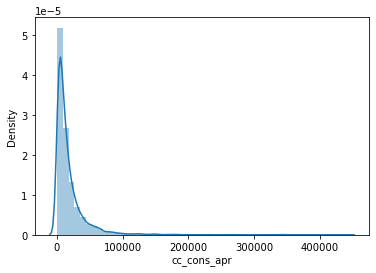

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


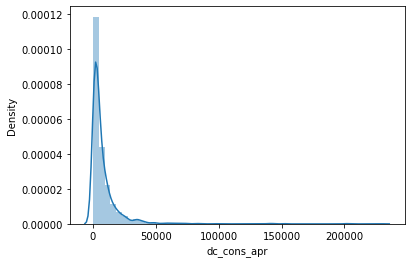

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


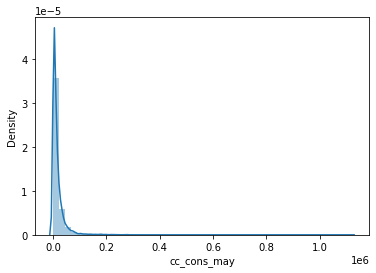

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


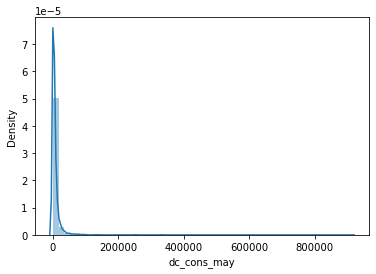

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


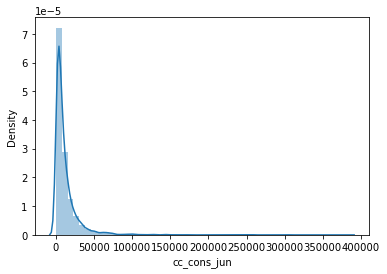

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


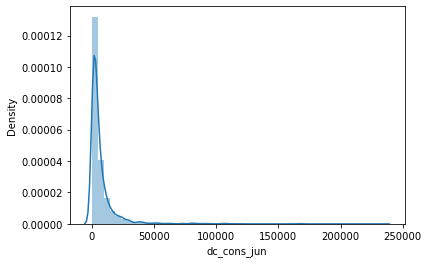

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


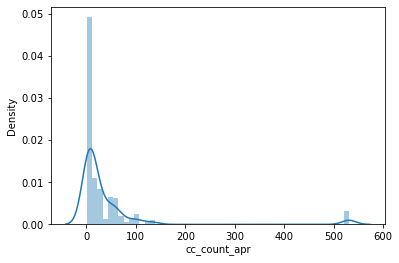

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


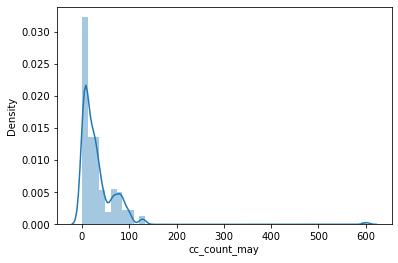

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


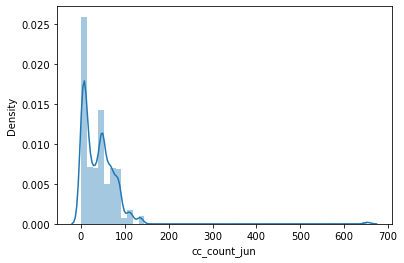

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


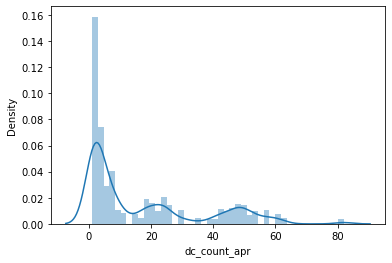

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


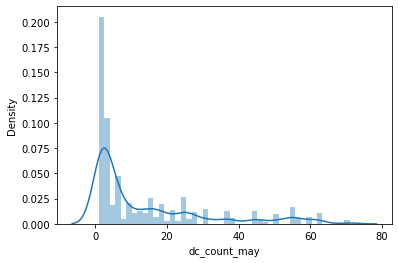

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


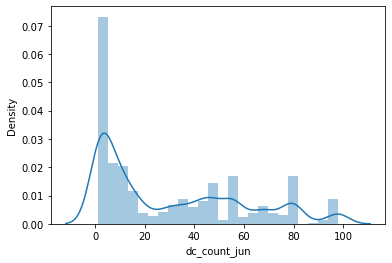

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


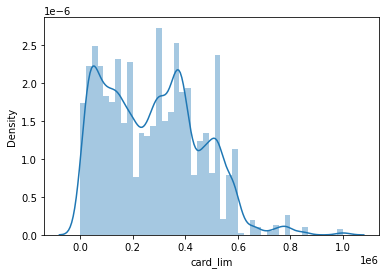

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


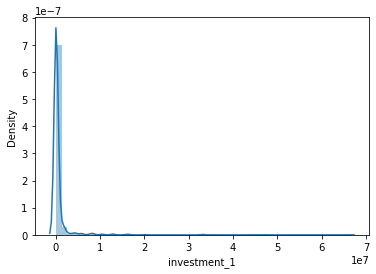

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


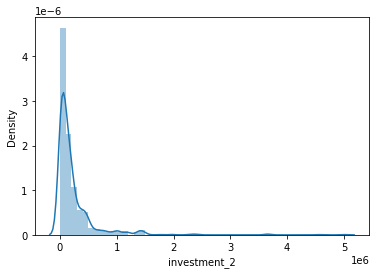

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


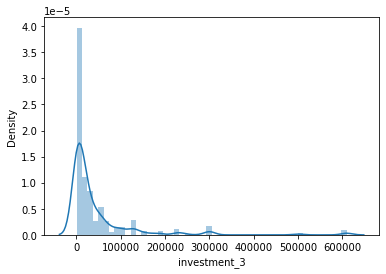

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


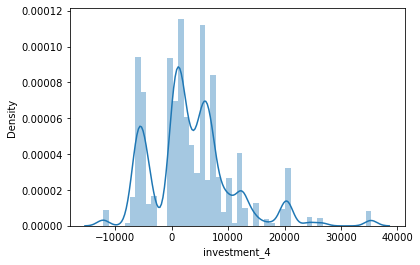

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


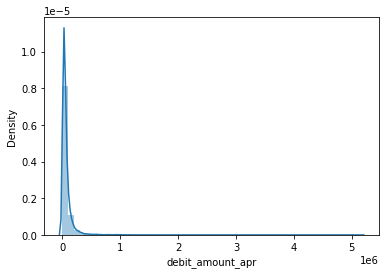

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


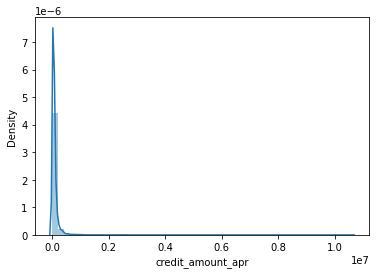

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


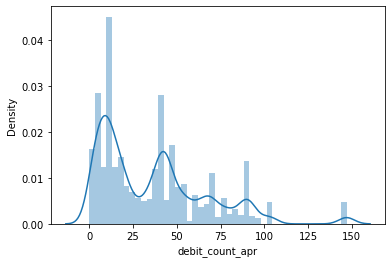

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


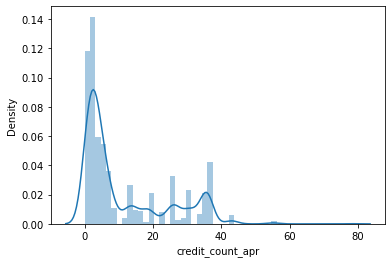

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


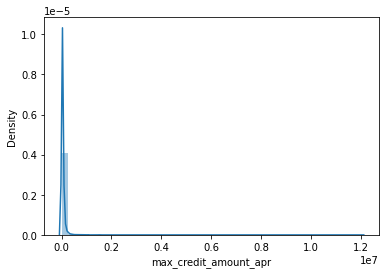

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


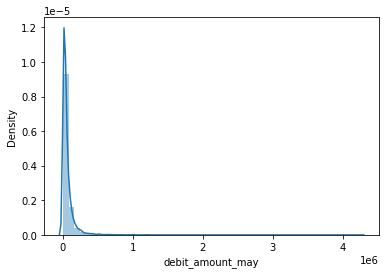

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


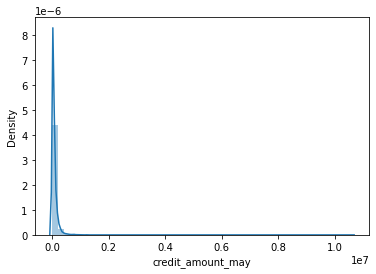

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


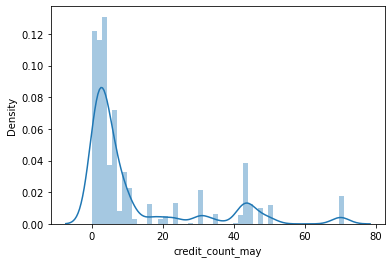

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


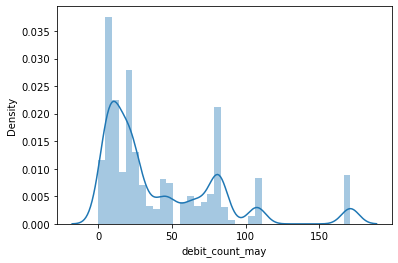

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


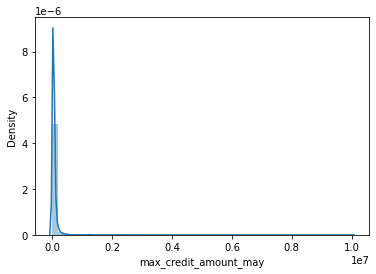

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


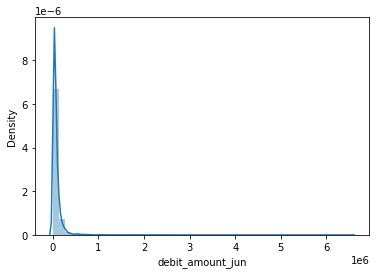

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


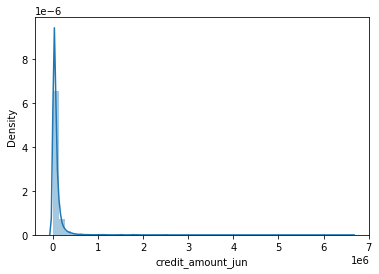

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


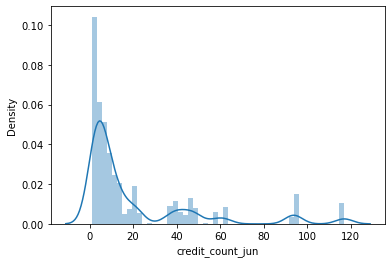

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


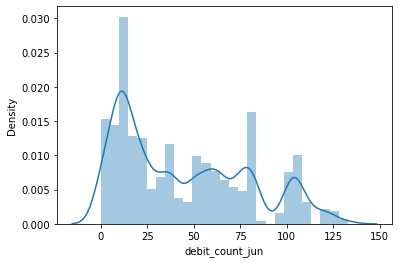

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


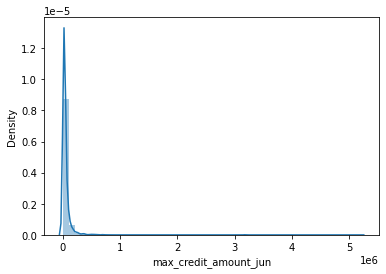

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


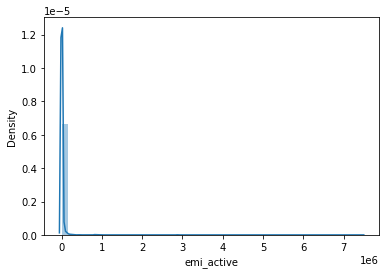

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


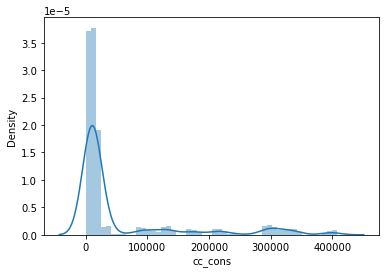

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


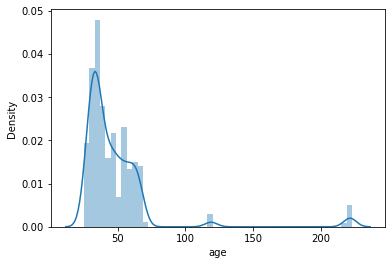

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


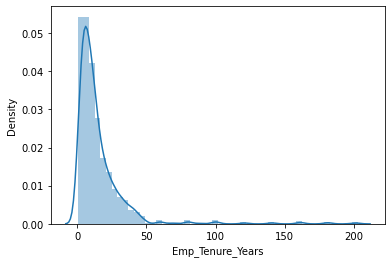

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


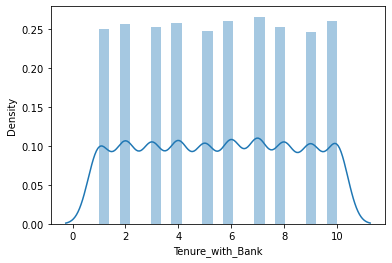

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


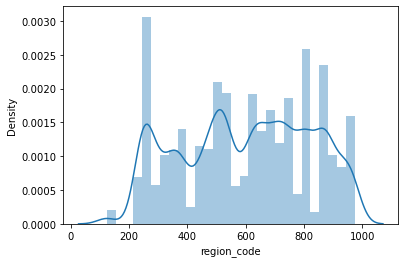

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


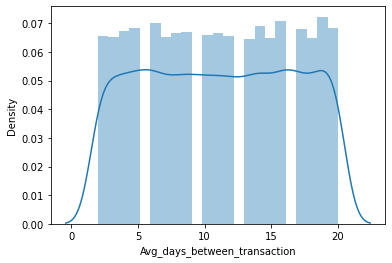

In [44]:
for i in df_num_train[1:]:
    sns.distplot(df_num_train[i])
    plt.pause(.05)

In [50]:
#Handling Outliers
def outlier_capping(x):
    x = x.clip(upper=x.quantile(0.99), lower =x.quantile(0.01) )
    return x

In [51]:
df_num_train=df_num_train.apply(lambda x: outlier_capping(x))
df_num_test=df_num_test.apply(lambda x: outlier_capping(x))

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


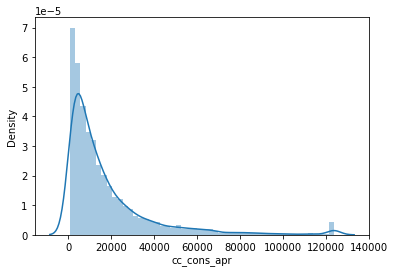

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


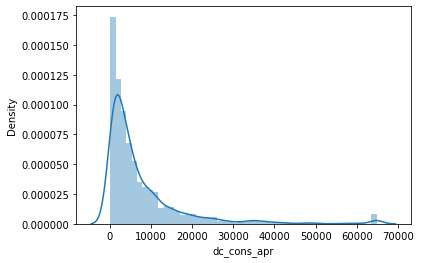

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


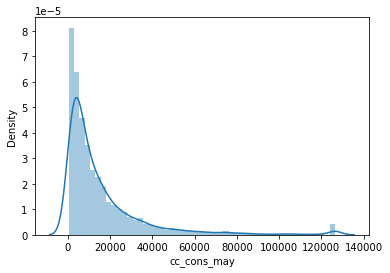

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


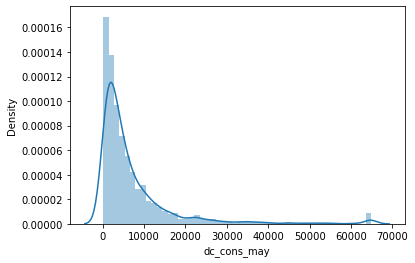

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


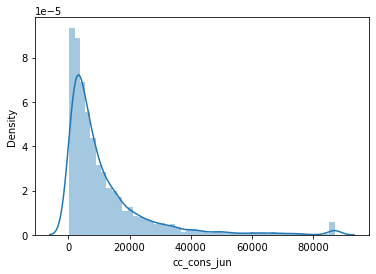

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


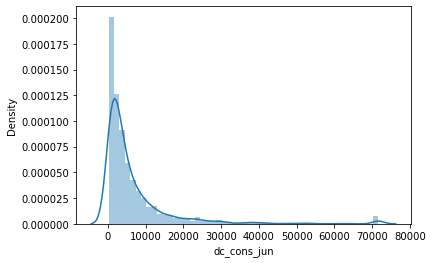

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


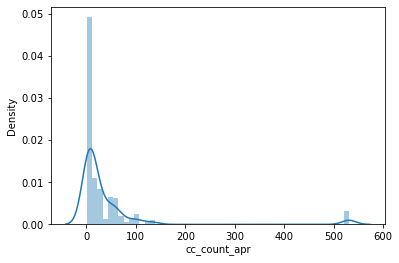

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


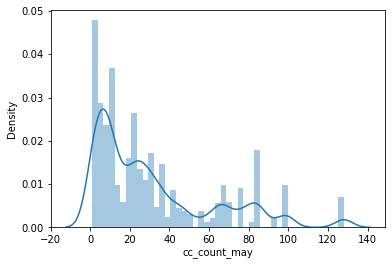

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


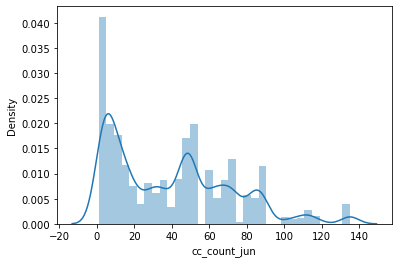

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


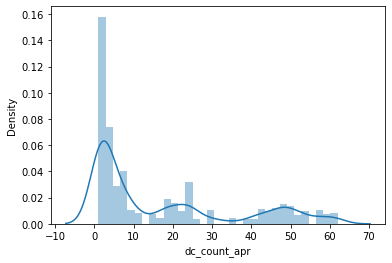

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


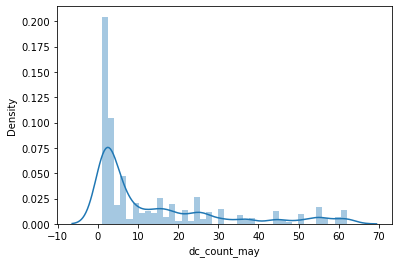

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


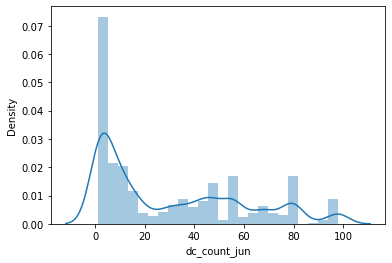

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


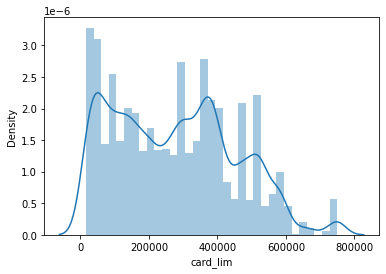

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


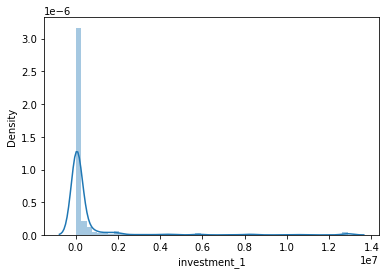

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


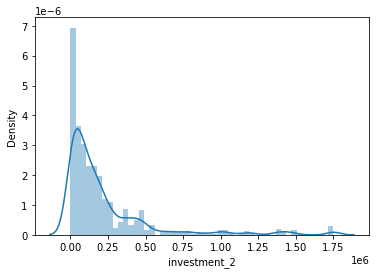

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


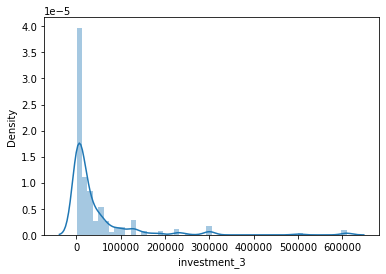

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


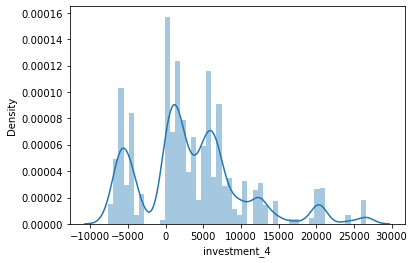

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


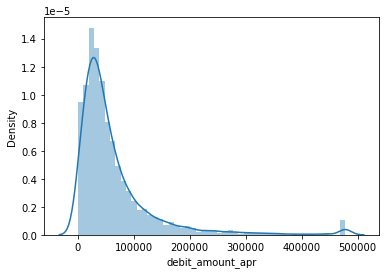

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


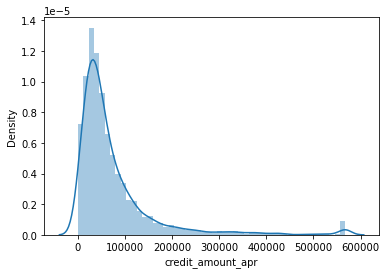

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


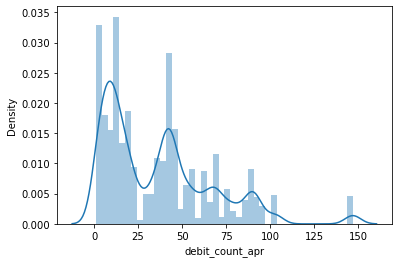

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


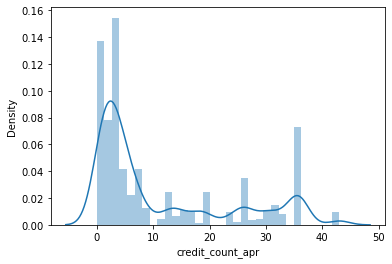

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


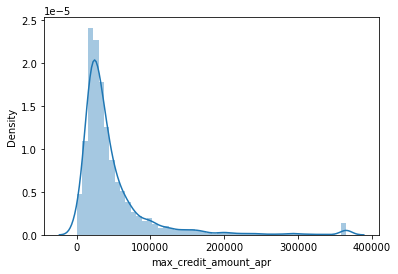

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


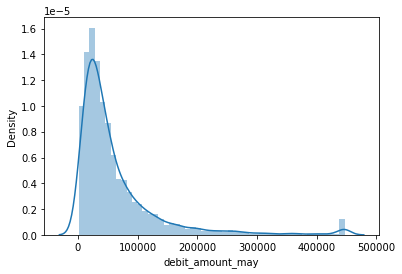

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


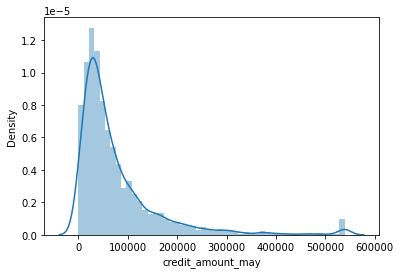

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


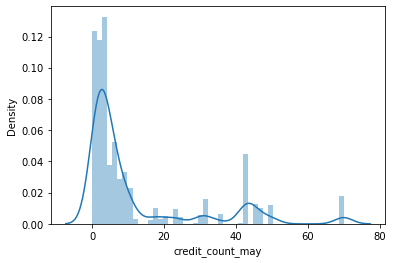

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


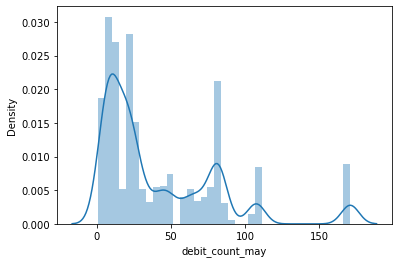

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


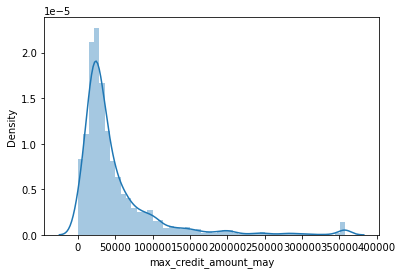

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


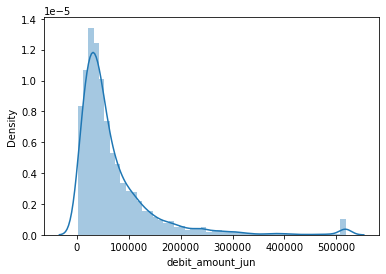

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


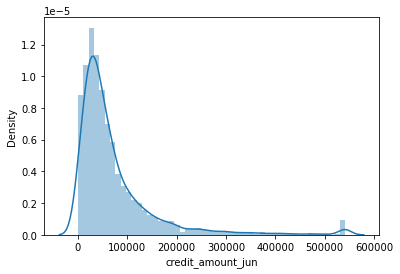

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


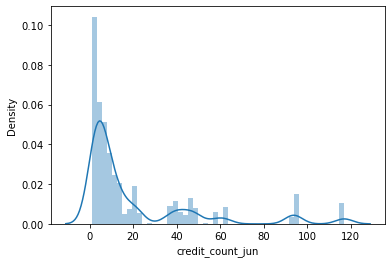

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


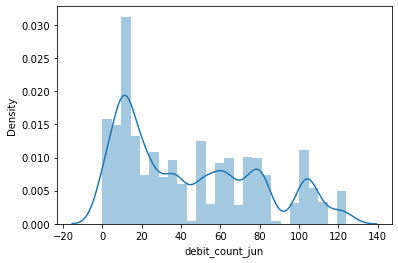

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


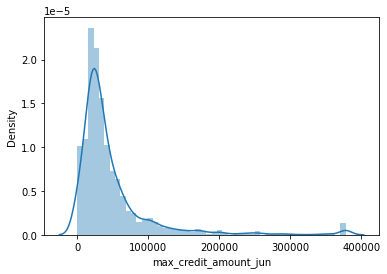

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


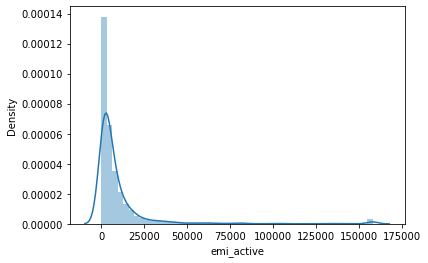

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


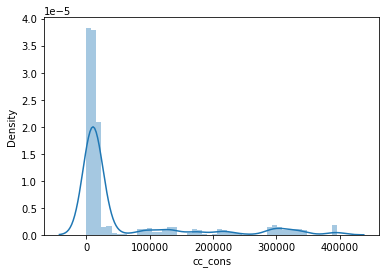

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


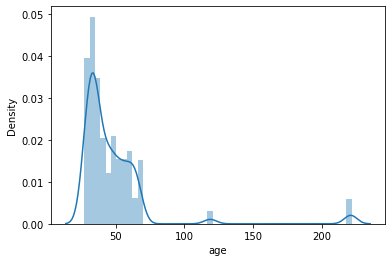

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


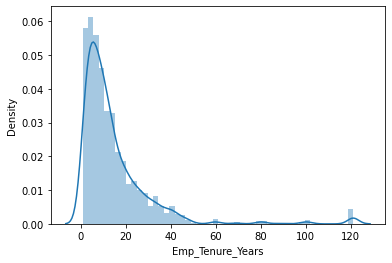

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


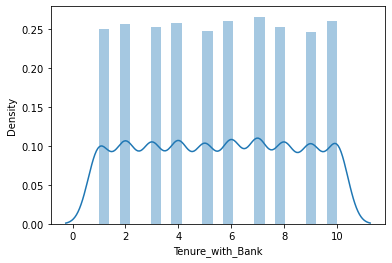

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


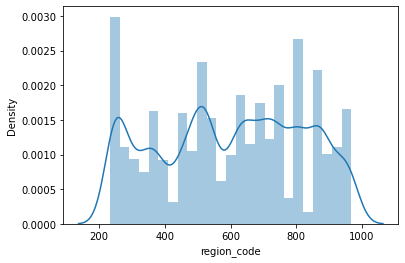

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


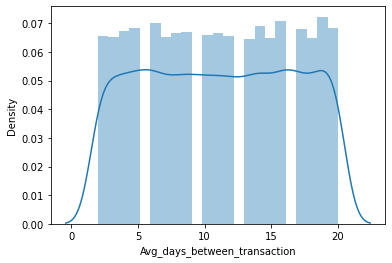

In [52]:
for i in df_num_train[1:]:
    sns.distplot(df_num_train[i])
    plt.pause(.05)

In [53]:
data_new_train=pd.concat([df_num_train, df_cat_train], axis=1)
data_new_train.head()

,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,...,gender_F,gender_M,Income_HIGH,Income_LOW,Income_MEDIUM,NetBanking_Flag,personal_loan_active,vehicle_loan_active,personal_loan_closed,vehicle_loan_closed
0,3412.60,2909.34,1077.36,3084.50,4615.97,6693.0,19.0,10.0,2.0,53.0,...,0,1,0,0,1,1,1,1,1.0,1
1,18133.76,3877.00,6123.78,5597.43,64620.00,6117.0,4.0,60.0,1.0,4.0,...,0,1,0,1,0,1,1,1,1.0,1
2,6363.65,735.49,8799.00,13768.00,38266.00,2638.0,2.0,83.0,47.0,4.0,...,0,1,0,0,1,1,1,1,1.0,1
3,12765.66,4429.16,16745.86,6360.00,29063.97,3711.0,12.0,2.0,16.0,24.0,...,0,1,0,1,0,0,1,1,1.0,1
4,27819.70,1944.00,7006.50,2228.50,1096.25,1065.0,15.0,13.0,61.0,7.0,...,0,1,0,0,1,0,1,1,1.0,1


In [54]:
data_new_test=pd.concat([df_num_test, df_cat_test], axis=1)
data_new_test

,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,...,gender_F,gender_M,Income_HIGH,Income_LOW,Income_MEDIUM,NetBanking_Flag,personal_loan_active,vehicle_loan_active,personal_loan_closed,vehicle_loan_closed
15000,2795.450,1290.00,6141.05,676.50,9146.10,15479.00,4.0,10.0,4.0,47.0,...,0,1,0,0,1,1,1,1,1.0,1
15001,29405.130,1640.00,1670.00,2463.92,10947.50,956.00,3.0,10.0,4.0,50.0,...,0,1,0,0,1,0,1,1,1.0,1
15002,5985.200,6189.00,2696.09,766.00,716.00,4133.22,7.0,30.0,5.0,24.0,...,0,1,0,1,0,1,1,1,1.0,1
15003,2105.930,18225.00,34763.56,167.00,4260.27,20185.00,1.0,99.0,71.0,5.0,...,0,1,0,0,1,1,1,1,1.0,1
15004,3269.000,3532.00,3158.40,2699.77,3373.48,5120.00,2.0,10.0,47.0,5.0,...,0,1,0,1,0,1,1,1,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,4641.500,5979.58,6008.61,4410.00,41743.00,1884.00,26.0,1.0,4.0,1.0,...,0,1,0,0,1,0,1,1,1.0,1
19996,4994.450,2805.37,23214.00,5870.00,1041.00,1008.73,37.0,56.0,50.0,18.0,...,0,1,0,0,1,1,1,1,1.0,1
19997,3262.145,2871.00,7335.25,11774.04,4130.00,1413.00,12.0,77.0,1.0,1.0,...,0,1,1,0,0,1,1,1,1.0,1
19998,12824.010,4866.00,12242.48,284.00,15132.77,37911.00,67.0,1.0,4.0,1.0,...,0,1,0,0,1,0,1,1,1.0,1


<AxesSubplot:>

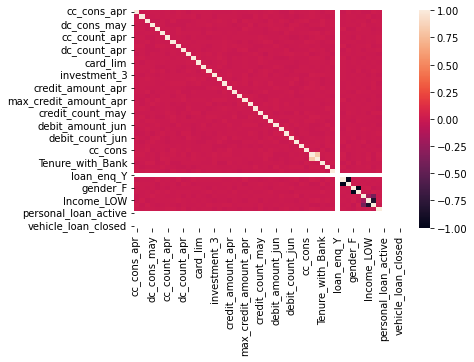

In [55]:
# visualize correlation matrix in Seaborn using a heatmap
sns.heatmap(data_new_train.corr())

In [ ]:
corr = data_new_train.corr()
corr.to_csv('corr.csv')

In [56]:
data_new_train.corr()

,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,...,gender_F,gender_M,Income_HIGH,Income_LOW,Income_MEDIUM,NetBanking_Flag,personal_loan_active,vehicle_loan_active,personal_loan_closed,vehicle_loan_closed
cc_cons_apr,1.000000,-0.000592,0.012623,0.006572,0.004569,-0.001050,0.000990,-0.001905,0.009504,0.001698,...,-0.005912,0.005912,-0.008497,-0.010028,0.014181,0.002184,NaN,NaN,NaN,NaN
dc_cons_apr,-0.000592,1.000000,0.004555,-0.001436,0.004465,-0.006944,0.004758,0.000811,0.008879,0.002607,...,0.002228,-0.002228,-0.000929,0.011243,-0.009988,-0.006853,NaN,NaN,NaN,NaN
cc_cons_may,0.012623,0.004555,1.000000,-0.011308,-0.019162,0.001065,-0.011654,0.009556,-0.012828,-0.008015,...,-0.007212,0.007212,0.005683,-0.018764,0.014332,0.006025,NaN,NaN,NaN,NaN
dc_cons_may,0.006572,-0.001436,-0.011308,1.000000,-0.005935,0.004672,-0.007892,-0.011367,-0.009936,-0.020796,...,0.004441,-0.004441,0.015643,-0.003283,-0.005776,0.000906,NaN,NaN,NaN,NaN
cc_cons_jun,0.004569,0.004465,-0.019162,-0.005935,1.000000,-0.003829,0.002029,-0.007346,0.011675,-0.009717,...,-0.008237,0.008237,0.007681,0.007047,-0.010933,-0.003292,NaN,NaN,NaN,NaN
dc_cons_jun,-0.001050,-0.006944,0.001065,0.004672,-0.003829,1.000000,-0.007348,-0.000128,0.012615,0.000628,...,-0.004947,0.004947,0.004317,0.004399,-0.006554,0.002005,NaN,NaN,NaN,NaN
cc_count_apr,0.000990,0.004758,-0.011654,-0.007892,0.002029,-0.007348,1.000000,-0.003170,0.001608,-0.006683,...,-0.010393,0.010393,-0.004914,0.002051,0.000861,0.012865,NaN,NaN,NaN,NaN
cc_count_may,-0.001905,0.000811,0.009556,-0.011367,-0.007346,-0.000128,-0.003170,1.000000,-0.002944,0.006317,...,0.005165,-0.005165,-0.004597,0.004625,-0.001725,0.011619,NaN,NaN,NaN,NaN
cc_count_jun,0.009504,0.008879,-0.012828,-0.009936,0.011675,0.012615,0.001608,-0.002944,1.000000,-0.002879,...,-0.005928,0.005928,0.001187,0.011363,-0.011297,-0.001610,NaN,NaN,NaN,NaN
dc_count_apr,0.001698,0.002607,-0.008015,-0.020796,-0.009717,0.000628,-0.006683,0.006317,-0.002879,1.000000,...,-0.006691,0.006691,-0.013113,0.005676,0.002108,0.010333,NaN,NaN,NaN,NaN


# variable reduction (feature selection/reduction)

In [57]:
from pandas import Series, DataFrame
#Modules related to split the data & gridsearch
from sklearn.model_selection import train_test_split, GridSearchCV

#Module related to calculation of metrics
from sklearn import metrics

#Module related to VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Moudles related to feature selection
from sklearn.feature_selection import RFE, RFECV, SelectKBest, chi2, SelectPercentile, f_classif, mutual_info_classif, f_regression, VarianceThreshold, SelectFromModel, mutual_info_classif, mutual_info_regression, SelectFpr, SelectFdr, SelectFwe
import statsmodels.formula.api as smf
import statsmodels.tsa as tsa

from sklearn.linear_model import LogisticRegression, LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.neighbors import  KNeighborsRegressor
from sklearn.tree import  DecisionTreeRegressor
from sklearn.ensemble import  BaggingRegressor,RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor 
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
from sklearn.svm import LinearSVC, LinearSVR, SVC, SVR
from sklearn.neural_network import MLPClassifier, MLPRegressor



In [ ]:
!pip install lightgbm 

In [ ]:
! pip install xgboost

In [48]:
import xgboost as xgb
import lightgbm as lgb

In [58]:
data_new_train.columns

Index(['cc_cons_apr', 'dc_cons_apr', 'cc_cons_may', 'dc_cons_may',
       'cc_cons_jun', 'dc_cons_jun', 'cc_count_apr', 'cc_count_may',
       'cc_count_jun', 'dc_count_apr', 'dc_count_may', 'dc_count_jun',
       'card_lim', 'investment_1', 'investment_2', 'investment_3',
       'investment_4', 'debit_amount_apr', 'credit_amount_apr',
       'debit_count_apr', 'credit_count_apr', 'max_credit_amount_apr',
       'debit_amount_may', 'credit_amount_may', 'credit_count_may',
       'debit_count_may', 'max_credit_amount_may', 'debit_amount_jun',
       'credit_amount_jun', 'credit_count_jun', 'debit_count_jun',
       'max_credit_amount_jun', 'emi_active', 'cc_cons', 'age',
       'Emp_Tenure_Years', 'Tenure_with_Bank', 'region_code',
       'Avg_days_between_transaction', 'loan_enq_Y', 'account_type_current',
       'account_type_saving', 'gender_F', 'gender_M', 'Income_HIGH',
       'Income_LOW', 'Income_MEDIUM', 'NetBanking_Flag',
       'personal_loan_active', 'vehicle_loan_active', 'p

# Somerc' D

In [ ]:
gini_df = pd.DataFrame()
for col in data_new_train.columns.difference(['cc_cons']):
    model = smf.logit('cc_cons~'+str(col), data=data_new_train).fit()
    gini = 2*metrics.roc_auc_score(data_new_train.default, model.predict(data_new_train))-1
    temp = pd.DataFrame([col, gini]).T
    gini_df = pd.concat([gini_df, temp], axis=0)

In [ ]:
gini_df.columns= ['Feature', 'SomerceD']
gini_df.sort_values(by='SomerceD', ascending=False, inplace=True)

In [ ]:
gini_df

# RFE

In [59]:
from sklearn.preprocessing import StandardScaler

In [ ]:

# Defining X and Y variables and converting them into numpy arrays 
X_train=data_new_train.drop('cc_cons', axis=1)
X=StandardScaler().fit_transform(X_train)
Y=data_new_train.cc_cons.values.reshape(-1, 1)

model = RandomForestRegressor()
rfe = RFE(model, n_features_to_select=15)
fit = rfe.fit(X, Y)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))


In [ ]:
x=data_new_train.drop('cc_cons', axis=1)
imp_vars_RFE=x.columns[(fit.support_)]

In [ ]:
imp_vars_RFE

# Select KBest

In [ ]:
X = data_new_train[data_new_train.columns.difference(['cc_cons'])]
SKB = SelectKBest(f_regression, k=15).fit(X, data_new_train[['cc_cons']] )

In [ ]:
SKB.get_support()
imp_vars_SKB = list(X.columns[SKB.get_support()])

In [ ]:
imp_vars_SKB

In [ ]:
['Emp_Tenure_Years',
 'Tenure_with_Bank',
 'age',
 'cc_cons_may',
 'cc_count_apr',
 'cc_count_may',
 'credit_amount_apr',
 'credit_count_may',
 'dc_cons_may',
 'dc_count_may',
 'emi_active',
 'investment_3',
 'max_credit_amount_jun',
 'max_credit_amount_may',
 'region_code']
      
['cc_cons_apr', 'dc_cons_apr', 'cc_cons_may', 'cc_cons_jun',
       'dc_cons_jun', 'debit_amount_apr', 'credit_amount_apr',
       'max_credit_amount_apr', 'debit_amount_may', 'credit_amount_may',
       'max_credit_amount_may', 'debit_amount_jun', 'credit_amount_jun',
       'max_credit_amount_jun', 'emi_active'

In [60]:
final_features=data_new_train[['cc_cons_may', 'credit_amount_apr','emi_active','max_credit_amount_apr',
                               'max_credit_amount_may','max_credit_amount_jun', 'Emp_Tenure_Years','Tenure_with_Bank', 'age',
                               'cc_count_apr', 'cc_count_may','credit_count_may','dc_cons_may','dc_cons_apr',
                               'dc_cons_jun','dc_count_may', 'investment_3','debit_amount_may', 'credit_amount_may',
                               'debit_amount_jun', 'credit_amount_jun']]

In [61]:
final_features.columns

Index(['cc_cons_may', 'credit_amount_apr', 'emi_active',
       'max_credit_amount_apr', 'max_credit_amount_may',
       'max_credit_amount_jun', 'Emp_Tenure_Years', 'Tenure_with_Bank', 'age',
       'cc_count_apr', 'cc_count_may', 'credit_count_may', 'dc_cons_may',
       'dc_cons_apr', 'dc_cons_jun', 'dc_count_may', 'investment_3',
       'debit_amount_may', 'credit_amount_may', 'debit_amount_jun',
       'credit_amount_jun'],
      dtype='object')

In [62]:
#Commone Features from Select Kbest and RFE
Common_features=data_new_train[['cc_cons_may', 'credit_amount_apr','emi_active','max_credit_amount_may',
                                 'max_credit_amount_jun']]

In [ ]:
X_new = final_features
### VIF Calculation for variables
vif = pd.DataFrame()
vif["VIF_Factor"] = [variance_inflation_factor(X_new.values, i) for i in range(X_new.shape[1])]
vif["features"] = X_new.columns

In [ ]:
vif.sort_values(by='VIF_Factor',ascending=False)

removing age from the list of final features

In [63]:
final_features=data_new_train[['cc_cons_may', 'credit_amount_apr','emi_active','max_credit_amount_apr',
                               'max_credit_amount_may','max_credit_amount_jun', 'Emp_Tenure_Years','Tenure_with_Bank',
                               'cc_count_apr', 'cc_count_may','credit_count_may','dc_cons_may','dc_cons_apr',
                               'dc_cons_jun','dc_count_may', 'investment_3','debit_amount_may', 'credit_amount_may',
                               'debit_amount_jun', 'credit_amount_jun']]

y_train=data_new_train[['cc_cons']]

In [ ]:
X_new = final_features
### VIF Calculation for variables
vif = pd.DataFrame()
vif["VIF_Factor"] = [variance_inflation_factor(X_new.values, i) for i in range(X_new.shape[1])]
vif["features"] = X_new.columns

In [ ]:
vif.sort_values(by='VIF_Factor',ascending=False)

In [64]:
data_final_train1=pd.concat([final_features, y_train], axis=1)

In [65]:
data_final_train1.columns

Index(['cc_cons_may', 'credit_amount_apr', 'emi_active',
       'max_credit_amount_apr', 'max_credit_amount_may',
       'max_credit_amount_jun', 'Emp_Tenure_Years', 'Tenure_with_Bank',
       'cc_count_apr', 'cc_count_may', 'credit_count_may', 'dc_cons_may',
       'dc_cons_apr', 'dc_cons_jun', 'dc_count_may', 'investment_3',
       'debit_amount_may', 'credit_amount_may', 'debit_amount_jun',
       'credit_amount_jun', 'cc_cons'],
      dtype='object')

In [66]:
data_final_test1=data_new_test[['cc_cons_may', 'credit_amount_apr', 'emi_active',
       'max_credit_amount_apr', 'max_credit_amount_may',
       'max_credit_amount_jun', 'Emp_Tenure_Years', 'Tenure_with_Bank', 'age',
       'cc_count_apr', 'cc_count_may', 'credit_count_may', 'dc_cons_may',
       'dc_cons_apr', 'dc_cons_jun', 'dc_count_may', 'investment_3',
       'debit_amount_may', 'credit_amount_may', 'debit_amount_jun',
       'credit_amount_jun']]

In [67]:
data_final_train1

,cc_cons_may,credit_amount_apr,emi_active,max_credit_amount_apr,max_credit_amount_may,max_credit_amount_jun,Emp_Tenure_Years,Tenure_with_Bank,cc_count_apr,cc_count_may,...,dc_cons_may,dc_cons_apr,dc_cons_jun,dc_count_may,investment_3,debit_amount_may,credit_amount_may,debit_amount_jun,credit_amount_jun,cc_cons
0,1077.36,27532.370000,3448.84,28579.0,97916.0,19947.00,7.0,5,19.0,10.0,...,3084.50,2909.34,6693.00,1.0,300500.0,44974.63,42852.00,45253.64,47635.00,13434.0000
1,6123.78,50784.000000,3812.69,25379.0,25125.0,20585.00,10.2,8,4.0,60.0,...,5597.43,3877.00,6117.00,1.0,610000.0,117575.67,24257.00,12912.33,18369.00,449.0000
2,8799.00,26345.000000,9432.90,19224.0,38546.0,13950.00,3.9,3,2.0,83.0,...,13768.00,735.49,2638.00,62.0,2156.0,14646.35,38306.00,93567.51,26713.00,11968.0000
3,16745.86,49660.000000,144.61,72186.0,180315.0,37018.00,25.8,6,12.0,2.0,...,6360.00,4429.16,3711.00,12.0,26241.0,14719.00,46132.05,176394.48,35062.74,32029.0000
4,7006.50,567741.141992,1887.89,18867.0,13480.0,24274.00,6.5,7,15.0,13.0,...,2228.50,1944.00,1065.00,5.0,13873.0,189938.76,37191.00,3167.00,19056.00,16394.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,7252.24,31135.000000,78966.76,27608.0,6936.0,82851.00,13.2,9,3.0,36.0,...,3873.00,1218.85,10107.00,55.0,16215.0,30501.77,23692.00,487751.19,42625.50,4263.0000
14996,16025.50,23797.000000,4762.10,30512.0,202639.0,118110.47,2.4,9,1.0,34.0,...,7610.00,6308.00,841.60,1.0,12337.0,57918.69,50023.00,8666.01,34987.55,11019.0000
14997,19360.26,95477.270000,2877.33,41085.0,44421.0,49545.00,3.4,9,57.0,23.0,...,494.00,948.74,1801.77,3.0,25000.0,25404.75,35239.00,97896.48,261432.00,395290.0055
14998,44341.13,59644.000000,13006.84,19110.0,22409.0,16130.00,40.0,10,7.0,128.0,...,34817.20,7191.05,1010.00,9.0,3975.0,46086.90,82193.00,22693.92,33025.29,28813.0000


# Relative Feature Importance using Decision Trees

In [68]:
X = data_final_train1.drop('cc_cons',axis=1).values
y = data_final_train1['cc_cons'].values

In [69]:
X_train_data=data_final_train1.drop('cc_cons',axis=1)
y_actual=data_final_train1['cc_cons']

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [71]:
X_train_data

,cc_cons_may,credit_amount_apr,emi_active,max_credit_amount_apr,max_credit_amount_may,max_credit_amount_jun,Emp_Tenure_Years,Tenure_with_Bank,cc_count_apr,cc_count_may,credit_count_may,dc_cons_may,dc_cons_apr,dc_cons_jun,dc_count_may,investment_3,debit_amount_may,credit_amount_may,debit_amount_jun,credit_amount_jun
0,1077.36,27532.370000,3448.84,28579.0,97916.0,19947.00,7.0,5,19.0,10.0,1.0,3084.50,2909.34,6693.00,1.0,300500.0,44974.63,42852.00,45253.64,47635.00
1,6123.78,50784.000000,3812.69,25379.0,25125.0,20585.00,10.2,8,4.0,60.0,1.0,5597.43,3877.00,6117.00,1.0,610000.0,117575.67,24257.00,12912.33,18369.00
2,8799.00,26345.000000,9432.90,19224.0,38546.0,13950.00,3.9,3,2.0,83.0,70.0,13768.00,735.49,2638.00,62.0,2156.0,14646.35,38306.00,93567.51,26713.00
3,16745.86,49660.000000,144.61,72186.0,180315.0,37018.00,25.8,6,12.0,2.0,43.0,6360.00,4429.16,3711.00,12.0,26241.0,14719.00,46132.05,176394.48,35062.74
4,7006.50,567741.141992,1887.89,18867.0,13480.0,24274.00,6.5,7,15.0,13.0,2.0,2228.50,1944.00,1065.00,5.0,13873.0,189938.76,37191.00,3167.00,19056.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,7252.24,31135.000000,78966.76,27608.0,6936.0,82851.00,13.2,9,3.0,36.0,1.0,3873.00,1218.85,10107.00,55.0,16215.0,30501.77,23692.00,487751.19,42625.50
14996,16025.50,23797.000000,4762.10,30512.0,202639.0,118110.47,2.4,9,1.0,34.0,4.0,7610.00,6308.00,841.60,1.0,12337.0,57918.69,50023.00,8666.01,34987.55
14997,19360.26,95477.270000,2877.33,41085.0,44421.0,49545.00,3.4,9,57.0,23.0,43.0,494.00,948.74,1801.77,3.0,25000.0,25404.75,35239.00,97896.48,261432.00
14998,44341.13,59644.000000,13006.84,19110.0,22409.0,16130.00,40.0,10,7.0,128.0,3.0,34817.20,7191.05,1010.00,9.0,3975.0,46086.90,82193.00,22693.92,33025.29


In [72]:
rgr_tree = DecisionTreeRegressor( max_depth = 3, max_features=3)
rgr_tree.fit( X_train, y_train )

DecisionTreeRegressor(max_depth=3, max_features=3)

In [73]:
rgr_tree.feature_importances_

array([0.2460264 , 0.32238393, 0.        , 0.        , 0.        ,
       0.18904922, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.13619744, 0.        , 0.        , 0.10634302, 0.        ])

In [75]:
# summarize the selection of the attributes
import itertools
feature_map = [(i, v) for i, v in itertools.zip_longest(X_train_data.columns, rgr_tree.feature_importances_)]

feature_map

[('cc_cons_may', 0.24602640247006183),
 ('credit_amount_apr', 0.32238392503598423),
 ('emi_active', 0.0),
 ('max_credit_amount_apr', 0.0),
 ('max_credit_amount_may', 0.0),
 ('max_credit_amount_jun', 0.18904921813930425),
 ('Emp_Tenure_Years', 0.0),
 ('Tenure_with_Bank', 0.0),
 ('cc_count_apr', 0.0),
 ('cc_count_may', 0.0),
 ('credit_count_may', 0.0),
 ('dc_cons_may', 0.0),
 ('dc_cons_apr', 0.0),
 ('dc_cons_jun', 0.0),
 ('dc_count_may', 0.0),
 ('investment_3', 0.13619743539129142),
 ('debit_amount_may', 0.0),
 ('credit_amount_may', 0.0),
 ('debit_amount_jun', 0.1063430189633583),
 ('credit_amount_jun', 0.0)]

In [77]:
Feature_importance = pd.DataFrame(feature_map, columns=['Feature', 'importance'])
Feature_importance.sort_values('importance', inplace=True, ascending=False)
Feature_importance.head(30)

,Feature,importance
1,credit_amount_apr,0.322384
0,cc_cons_may,0.246026
5,max_credit_amount_jun,0.189049
15,investment_3,0.136197
18,debit_amount_jun,0.106343
11,dc_cons_may,0.000000
17,credit_amount_may,0.000000
16,debit_amount_may,0.000000
14,dc_count_may,0.000000
13,dc_cons_jun,0.000000


In [ ]:
#Commone Features from Select Kbest and RFE
Common_features=data_new_train[['cc_cons_may', 'credit_amount_apr','emi_active','max_credit_amount_may',
                                 'max_credit_amount_jun']]

In [78]:
# after going through the feature importance techniques, taking the final list of features as

final_features=data_new_train[['cc_cons_may', 'credit_amount_apr','investment_3','debit_amount_jun','max_credit_amount_jun',
                              'cc_cons']]

In [79]:
final_features

,cc_cons_may,credit_amount_apr,investment_3,debit_amount_jun,max_credit_amount_jun,cc_cons
0,1077.36,27532.370000,300500.0,45253.64,19947.00,13434.0000
1,6123.78,50784.000000,610000.0,12912.33,20585.00,449.0000
2,8799.00,26345.000000,2156.0,93567.51,13950.00,11968.0000
3,16745.86,49660.000000,26241.0,176394.48,37018.00,32029.0000
4,7006.50,567741.141992,13873.0,3167.00,24274.00,16394.0000
...,...,...,...,...,...,...
14995,7252.24,31135.000000,16215.0,487751.19,82851.00,4263.0000
14996,16025.50,23797.000000,12337.0,8666.01,118110.47,11019.0000
14997,19360.26,95477.270000,25000.0,97896.48,49545.00,395290.0055
14998,44341.13,59644.000000,3975.0,22693.92,16130.00,28813.0000


# Running the model with Linear Regression

In [116]:
X = final_features.drop('cc_cons',axis=1).values
y = final_features['cc_cons'].values

In [117]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [118]:
linreg=LinearRegression()

In [119]:
linreg.fit(X_train,y_train)

LinearRegression()

In [120]:
y_pred=linreg.predict(X_test)
y_actual_test=y_test

In [121]:
rmspe_lm =(np.sqrt(np.mean(np.square((y_actual_test - y_pred) / y_actual_test)))) * 100

In [122]:
rmspe_lm

2842.573524848439

# Decision Tree Model with Parameter Tuning

In [123]:
param_grid = {'max_depth': np.arange(3, 5),
             'max_features': np.arange(3,5)}

In [124]:
tree = GridSearchCV(DecisionTreeRegressor(), param_grid, cv = 5)
tree.fit( X_train, y_train )

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': array([3, 4]),
                         'max_features': array([3, 4])})

In [125]:
tree.best_score_

-0.005291559136565249

In [126]:
tree.best_estimator_

DecisionTreeRegressor(max_depth=3, max_features=3)

In [127]:
tree.best_params_

{'max_depth': 3, 'max_features': 3}

In [128]:
rgr_tree = DecisionTreeRegressor( max_depth = 3, max_features=3)
rgr_tree.fit( X_train, y_train )

DecisionTreeRegressor(max_depth=3, max_features=3)

In [129]:
y_predicted_dt=tree.predict(X_test)

In [130]:
y_predicted_dt

array([56116.0124928 , 56116.0124928 , 56116.0124928 , ...,
       53869.22365588, 56116.0124928 , 56116.0124928 ])

In [131]:
y_actual_test

array([ 15182.,   2480.,   5950., ...,   3214., 325636.,  13839.])

In [132]:
rmspe_dt =(np.sqrt(np.mean(np.square((y_actual_test - y_predicted_dt) / y_actual_test)))) * 100

In [133]:
rmspe_dt 

2808.81276823665

# Random Forest

In [134]:
rfr=RandomForestRegressor()
rfr.fit( X_train, y_train )

RandomForestRegressor()

In [143]:
y_predicted_rf=rfr.predict(X_test)

In [144]:
y_predicted_rf

array([115476.860218,  51603.089999,  49989.280055, ...,  44792.939999,
        53725.42    ,  75264.9     ])

In [137]:
y_actual_test

array([ 15182.,   2480.,   5950., ...,   3214., 325636.,  13839.])

In [145]:
rmspe_rf =(np.sqrt(np.mean(np.square((y_actual_test - y_predicted_rf) / y_actual_test)))) * 100

In [146]:
rmspe_rf

3468.2185013495614

# Gradient Boost Regressor

In [147]:
gb=GradientBoostingRegressor(n_estimators=100)
gb.fit( X_train, y_train )

GradientBoostingRegressor()

In [150]:
y_predicted_gb=gb.predict(X_test)
y_predicted_gb

array([67211.11245968, 55786.98470521, 61063.96173021, ...,
       45320.74248505, 45384.76683353, 53694.8304602 ])

In [151]:
rmspe_gb =(np.sqrt(np.mean(np.square((y_actual_test - y_predicted_rf) / y_actual_test)))) * 100
rmspe_gb

3468.2185013495614

# Building Multiple Models

In [140]:
import xgboost as xgb
import lightgbm as lgb

In [141]:
regrr = [LinearRegression(),DecisionTreeRegressor(max_depth=6),RandomForestRegressor(),
         GradientBoostingRegressor(n_estimators=100)]

In [142]:
%%time
tr= []
te =[]
for mod in regrr:
    model = mod
    model.fit(X_train,y_train)
    pred_tr = model.predict(X_train)
    pred_te = model.predict(X_test)
    tr.append(np.sqrt(np.mean(np.square((y_actual_test- pred_tr)/ y_actual_test)))) * 100
    te.append(np.sqrt(np.mean(np.square((y_actual_test- pred_te)/ y_actual_test)))) * 100
    
    (np.sqrt(np.mean(np.square((y_actual_test - y_predicted1) / y_actual_test)))) * 100


ValueError: operands could not be broadcast together with shapes (4500,) (10500,) 

In [ ]:
model_nm = 'Linearreg DT GBM XGB LGB'.split()
result = pd.DataFrame({'model':model_nm,'train_error':tr,'test_error':te})

In [ ]:
print('rmspe train:',np.sqrt(mean_squared_error(np.exp(pred_tr_dt),np.exp(train_y))))
print('rmspe test:',np.sqrt(mean_squared_error(np.exp(pred_te_dt),np.exp(test_y))))

In [ ]:
result